In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
#import dataset
data = pd.read_csv(r'E:\Python\data\Salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [4]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [5]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [6]:
y = y.reshape(len(y),1)
print(y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
X = X_sc.fit_transform(X)
y = y_sc.fit_transform(y)

In [8]:
print(X)


[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]
 [ 1.21377673]
 [ 1.32129632]
 [ 1.50049564]
 [ 1.5363355 ]
 [ 1.78721455]
 [ 1.85889428]]


In [9]:
print(y)

[[-1.36011263]
 [-1.10552744]
 [-1.419919  ]
 [-1.20495739]
 [-1.33978143]
 [-0.71830716]
 [-0.58815781]
 [-0.79981746]
 [-0.42881019]
 [-0.69801306]
 [-0.47433279]
 [-0.74976858]
 [-0.70662043]
 [-0.70201994]
 [-0.55250402]
 [-0.29921736]
 [-0.37004264]
 [ 0.26285865]
 [ 0.19885989]
 [ 0.66547573]
 [ 0.58377993]
 [ 0.82623317]
 [ 0.93861127]
 [ 1.40274136]
 [ 1.24020308]
 [ 1.09740238]
 [ 1.51986835]
 [ 1.3590738 ]
 [ 1.72102849]
 [ 1.70177321]]


In [10]:
#Training the SVR model on the whole dataset
from sklearn.svm import SVR
regression = SVR(kernel = 'rbf')
regression.fit(X,y)

e:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
y_sc.inverse_transform(regression.predict(X_sc.fit_transform([[10]])))

array([73695.43166353])

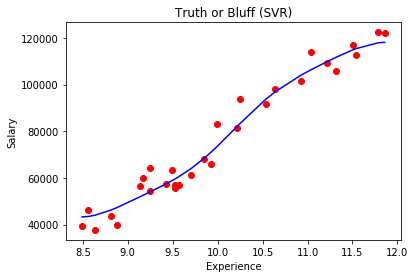

In [12]:
#Visualising the SVR results
plt.scatter(X_sc.inverse_transform(X), y_sc.inverse_transform(y), color = 'red')
plt.plot(X_sc.inverse_transform(X), y_sc.inverse_transform(regression.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()